In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [4]:
import sys
sys.path.append('../modules/')

In [5]:
%reload_ext autoreload
%autoreload 2
import datasets

In [28]:
exp_name = 'P2L'
DT = datasets.SimulationData(simulation_names=[exp_name], filter_scales=['50','100','200','400'])

In [29]:
DT.preprocess_simulation_data(window_size=1)

In [30]:
DT.simulation_data

DataTree('None', parent=None)
└── DataTree('P2L')
    ├── DataTree('50')
    │       Dimensions:                      (Time: 7200, xh: 150, yh: 200, zl: 2, Xn: 1,
    │                                         Yn: 1, zi: 3)
    │       Coordinates:
    │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
    │         * xh                           (xh) float64 1kB 4.0 12.0 ... 1.196e+03
    │         * yh                           (yh) float64 2kB 4.0 12.0 ... 1.596e+03
    │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
    │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables: (12/40)
    │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dvdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           ...                           ...
    │           dvdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dvdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           uphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 200, 150), meta=np.ndarray>
    │           vphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 200, 150), meta=np.ndarray>
    │       Attributes:
    │           simulation_name:  P2L
    │           filter_scale:     50
    │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
    │           description:      Dataset for P2L experiment at 50 km resolution
    ├── DataTree('100')
    │       Dimensions:                      (Time: 7200, xh: 60, yh: 80, zl: 2, Xn: 1,
    │                                         Yn: 1, zi: 3)
    │       Coordinates:
    │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
    │         * xh                           (xh) float64 480B 10.0 30.0 ... 1.19e+03
    │         * yh                           (yh) float64 640B 10.0 30.0 ... 1.59e+03
    │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
    │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables: (12/40)
    │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 553MB dask.array<chunksize=(36, 2, 80, 60, 1, 1), meta=np.ndarray>
    │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 553MB dask.array<chunksize=(36, 2, 80, 60, 1, 1), meta=np.ndarray>
    │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 553MB dask.array<chunksize=(36, 2, 80, 60, 1, 1), meta=np.ndarray>
    │  

## Distribution plots

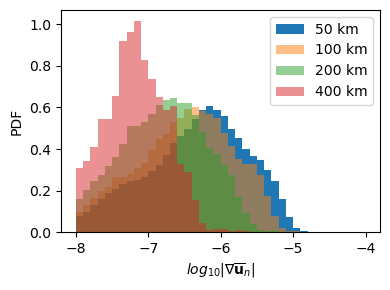

In [25]:
plt.figure(figsize=(4,3)) 
bins = np.linspace(-8, -4, 41)

np.log10(DT.simulation_data[exp_name]['50'].mag_nabla_u_widened).isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, label='50 km')
np.log10(DT.simulation_data[exp_name]['100'].mag_nabla_u_widened).isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, alpha=0.5, label='100 km')
np.log10(DT.simulation_data[exp_name]['200'].mag_nabla_u_widened).isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, alpha=0.5, label='200 km')
np.log10(DT.simulation_data[exp_name]['400'].mag_nabla_u_widened).isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, alpha=0.5, label='400 km')
plt.legend()
plt.ylabel('PDF')
plt.xlabel(r'$log_{10} |\nabla \overline{\mathbf{u}}_n|$')

plt.tight_layout()
plt.savefig('grad_u_norm.png')

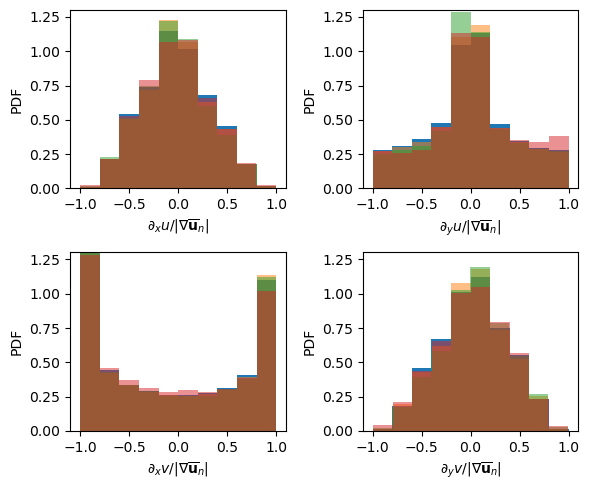

In [27]:
plt.figure(figsize=(6, 5))

def plot_var_pdfs(var): 
    DT.simulation_data[exp_name]['50'][var].isel(Time=slice(-10, None)).plot.hist(density=True)
    DT.simulation_data[exp_name]['100'][var].isel(Time=slice(-10, None)).plot.hist(density=True, alpha=0.5)
    DT.simulation_data[exp_name]['200'][var].isel(Time=slice(-10, None)).plot.hist(density=True, alpha=0.5)
    DT.simulation_data[exp_name]['400'][var].isel(Time=slice(-10, None)).plot.hist(density=True, alpha=0.5)
    plt.ylim([0, 1.3])
    plt.ylabel('PDF')
    

plt.subplot(221)
plot_var_pdfs('dudx_widened_rotated_nondim')
plt.xlabel(r'$\partial_x u / |\nabla \overline{\mathbf{u}}_n|$')

plt.subplot(222)
plot_var_pdfs('dudy_widened_rotated_nondim')
plt.xlabel(r'$\partial_y u / |\nabla \overline{\mathbf{u}}_n|$')

plt.subplot(223)
plot_var_pdfs('dvdx_widened_rotated_nondim')
plt.xlabel(r'$\partial_x v / |\nabla \overline{\mathbf{u}}_n|$')

plt.subplot(224)
plot_var_pdfs('dvdy_widened_rotated_nondim')
plt.xlabel(r'$\partial_y v / |\nabla \overline{\mathbf{u}}_n|$')

plt.tight_layout()

plt.savefig('grad_u_normed.png')

## Coordinate rotation 

In [67]:
def plot_var_pdfs(var, bins=51, ylim=[1e-5, 1], xlim=[-60, 60]): 
    DT.simulation_data[exp_name]['50'][var].isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, label='50km')
    DT.simulation_data[exp_name]['100'][var].isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, alpha=0.5, label='100km')
    DT.simulation_data[exp_name]['200'][var].isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, alpha=0.5, label='200km')
    DT.simulation_data[exp_name]['400'][var].isel(Time=slice(-10, None)).plot.hist(bins=bins, density=True, alpha=0.5, label='400km')
    #plt.ylim(ylim)
    #plt.xlim(xlim)
    plt.ylabel('PDF')
    plt.yscale('log')
    

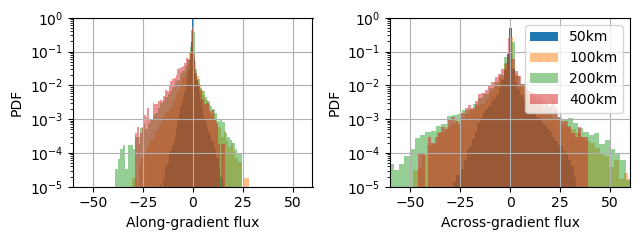

In [62]:
plt.figure(figsize=(6.5, 2.5))

plt.subplot(121)
plot_var_pdfs('uphp_rotated')
plt.grid()
plt.xlabel('Along-gradient flux')

plt.subplot(122)
plot_var_pdfs('vphp_rotated')
plt.grid()
plt.legend()
plt.xlabel('Across-gradient flux')

plt.tight_layout()
plt.savefig('rotated_fluxes.png')

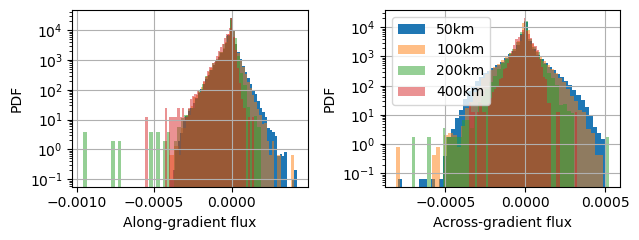

In [68]:
plt.figure(figsize=(6.5, 2.5))

plt.subplot(121)
plot_var_pdfs('uphp_rotated_nondim')
plt.grid()
plt.xlabel('Along-gradient flux')

plt.subplot(122)
plot_var_pdfs('vphp_rotated_nondim')
plt.grid()
plt.legend()
plt.xlabel('Across-gradient flux')

plt.tight_layout()
#plt.savefig('rotated_fluxes.png')

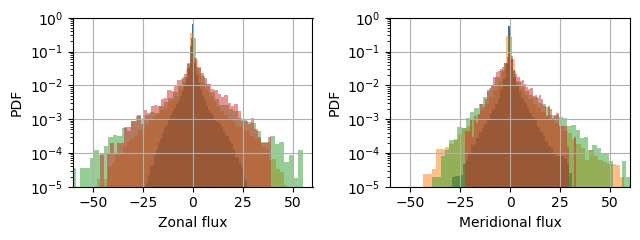

In [63]:
plt.figure(figsize=(6.5, 2.5))

plt.subplot(121)
plot_var_pdfs('uphp')
plt.grid()
plt.xlabel('Zonal flux')

plt.subplot(122)
plot_var_pdfs('vphp')
plt.grid()
#plt.legend()
plt.xlabel('Meridional flux')

plt.tight_layout()
plt.savefig('xy_fluxes.png')

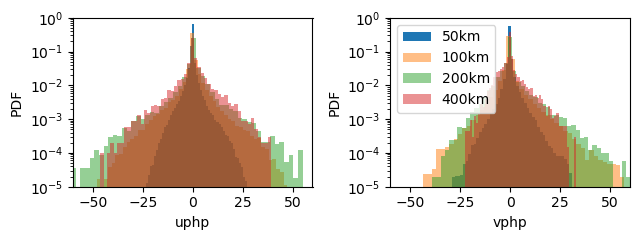

In [59]:
plt.figure(figsize=(6.5, 2.5))

plt.subplot(121)
plot_var_pdfs('uphp')


plt.subplot(122)
plot_var_pdfs('vphp')
plt.legend()

plt.tight_layout()

## Vorticity plots 

In [7]:
def add_vort(ds): 
    ds = ds.copy()
    ds['vort'] = ds.dvdx - ds.dudy
    return ds 

In [8]:
DT.simulation_data.map_over_subtree_inplace(add_vort)

In [9]:
DT.simulation_data['P2L']['50']

DataTree('50', parent="P2L")
    Dimensions:                      (Time: 7200, xh: 150, yh: 200, zl: 2, Xn: 1,
                                      Yn: 1, zi: 3)
    Coordinates:
      * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
      * xh                           (xh) float64 1kB 4.0 12.0 ... 1.196e+03
      * yh                           (yh) float64 2kB 4.0 12.0 ... 1.596e+03
      * zl                           (zl) float64 16B 1.031e+03 1.033e+03
      * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
    Dimensions without coordinates: Xn, Yn
    Data variables: (12/41)
        dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        dvdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        dhdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        dhdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        ...                           ...
        dvdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        dhdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        dhdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
        uphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 200, 150), meta=np.ndarray>
        vphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 200, 150), meta=np.ndarray>
        vort                         (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 200, 150), meta=np.ndarray>
    Attributes:
        simulation_name:  P2L
        filter_scale:     50
        source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
        description:      Dataset for P2L experiment at 50 km resolution

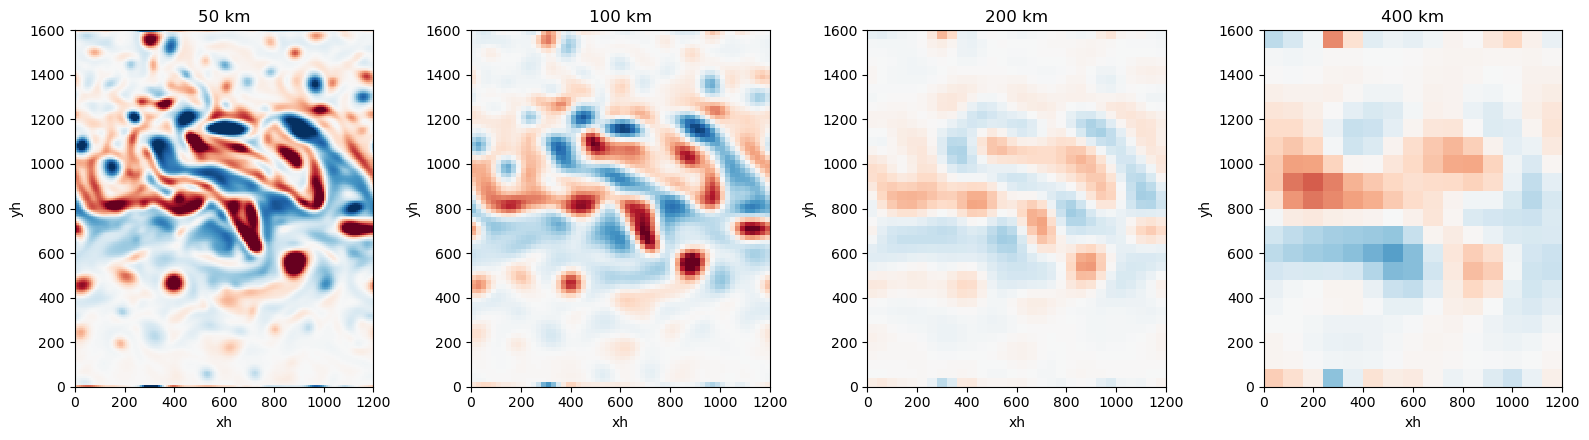

In [10]:
plt.figure(figsize=(16, 4.5))

vmin = -3e-5
for i, L in enumerate(['50','100','200','400']): 
    plt.subplot(1,4, i+1)
    ds = DT.simulation_data['P2L'][L]
    if L=='400':
        ds.vort.isel(Time=-1, zl=0).plot(vmin= vmin/5, add_colorbar=False)
    else:
        ds.vort.isel(Time=-1, zl=0).plot(vmin= vmin, add_colorbar=False)

    plt.title(L+' km')
plt.tight_layout()
plt.savefig('filtered_vort.png')

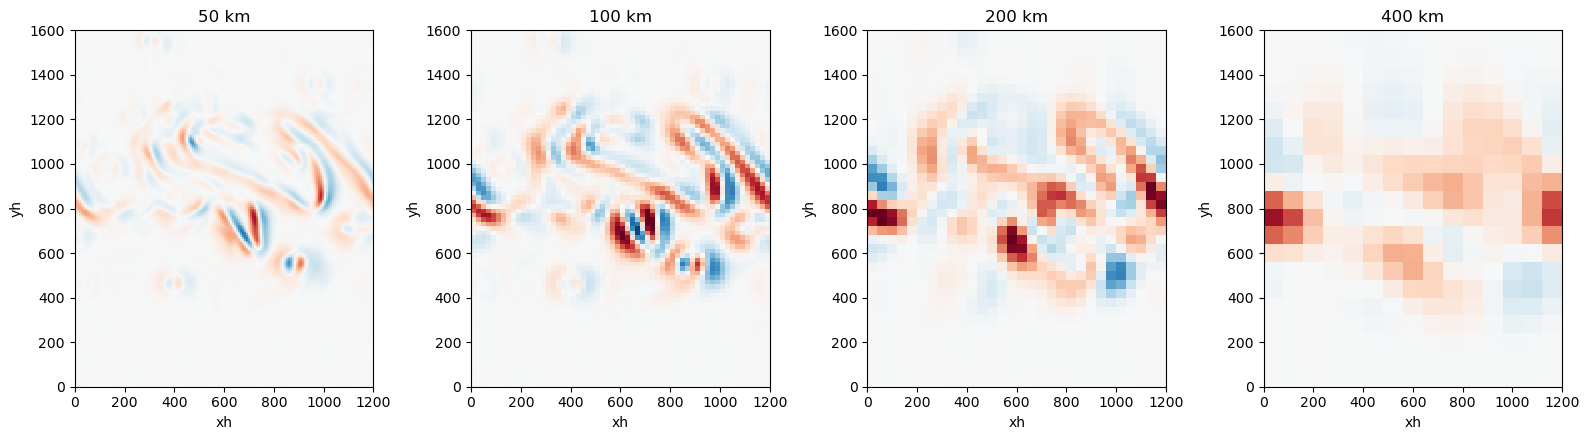

In [11]:
plt.figure(figsize=(16, 4.5))

vmin = -30
for i, L in enumerate(['50','100','200','400']): 
    plt.subplot(1,4, i+1)
    ds = DT.simulation_data['P2L'][L]
    if L=='400':
        ds.vphp.isel(Time=-1, zl=0).plot(vmin= vmin, add_colorbar=False)
    else:
        ds.vphp.isel(Time=-1, zl=0).plot(vmin= vmin, add_colorbar=False)

    plt.title(L+' km')
plt.tight_layout()
plt.savefig('filtered_vort.png')

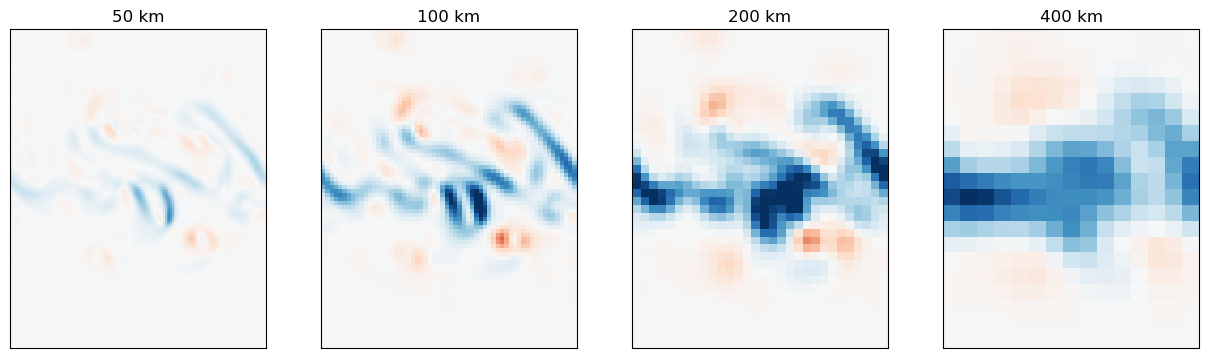

In [17]:
plt.figure(figsize=(13, 4.5))

vmin = -10
for i, L in enumerate(['50','100','200','400']): 
    ax = plt.subplot(1,4, i+1)
    ds = DT.simulation_data['P2L'][L]
    # if L=='400':
    #     ds.vphp.isel(Time=-1, zl=1).plot(vmin= vmin, add_colorbar=False)
    # else:
    ds.vphp.isel(Time=-1, zl=1).plot(vmin= vmin, add_colorbar=False, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([])
    ax.set_yticks([])

    plt.title(L+' km')
plt.tight_layout(pad=4.)
#plt.subplots_adjust(wspace=0, hspace=0)
plt.gcf().patch.set_alpha(0)

plt.savefig('filtered_vphp.png')